In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import tensorflow as tf

In [2]:
data = pd.read_csv('ETH-USD.csv')

In [3]:
data = data.set_index(pd.DatetimeIndex(data['Date'].values))
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
2015-09-13,2015-09-13,1.041780,1.042700,0.902832,0.936003,0.936003,644138.0
2015-09-14,2015-09-14,0.940566,0.949387,0.871760,0.875622,0.875622,741085.0
2015-09-15,2015-09-15,0.875189,1.045540,0.875189,0.944410,0.944410,703390.0
2015-09-16,2015-09-16,0.941977,0.952698,0.901639,0.907175,0.907175,615593.0
2015-09-17,2015-09-17,0.906865,0.909204,0.831132,0.874231,0.874231,897940.0


In [4]:
data.shape

(2193, 7)

In [5]:
data.isnull().sum()

Date         0
Open         4
High         4
Low          4
Close        4
Adj Close    4
Volume       4
dtype: int64

In [6]:
data = data.fillna(method='ffill')

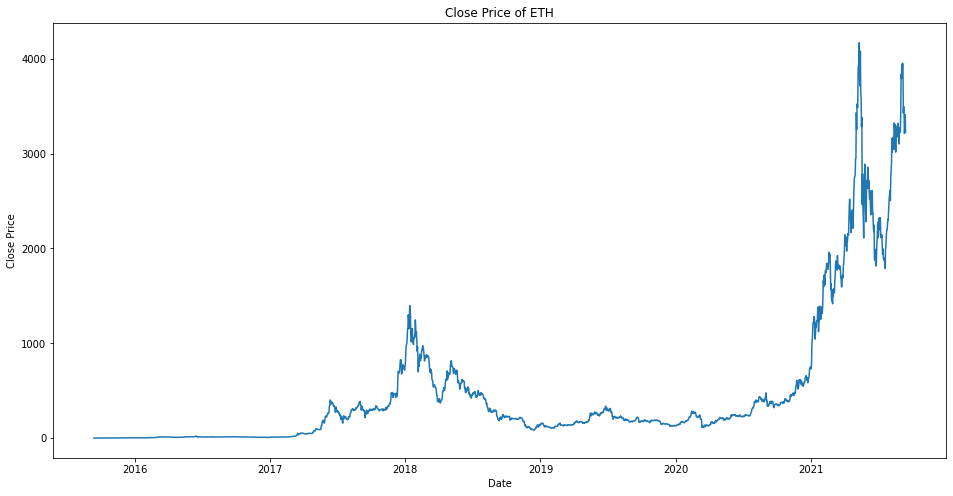

In [7]:
plt.figure(figsize=(16,8))
plt.title("Close Price of ETH")
plt.plot(data['Close'])
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

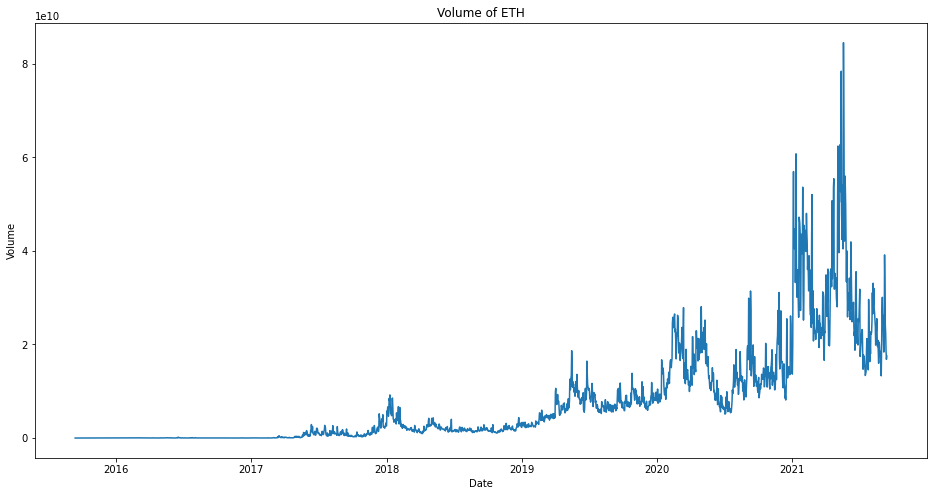

In [8]:
plt.figure(figsize=(16,8))
plt.title("Volume of ETH")
plt.plot(data['Volume'])
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()

In [9]:
df = data.filter(['Close'])
dataset = df.values
dataset

array([[9.36003000e-01],
       [8.75622000e-01],
       [9.44410000e-01],
       ...,
       [3.27027808e+03],
       [3.41013452e+03],
       [3.22328052e+03]])

In [10]:
training_data_len = math.ceil(len(dataset)*0.8)
training_data_len

1755

In [11]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[1.20235599e-04],
       [1.05749720e-04],
       [1.22252505e-04],
       ...,
       [7.84461207e-01],
       [8.18013872e-01],
       [7.73186122e-01]])

In [12]:
train_data = scaled_data[0:training_data_len, :]
x_train = []
y_train = []

In [13]:
for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<=60:
    print(x_train)
    print(y_train)

[array([1.20235599e-04, 1.05749720e-04, 1.22252505e-04, 1.13319534e-04,
       1.05416008e-04, 1.00486861e-04, 1.07373657e-04, 1.20821454e-04,
       1.16167721e-04, 1.12029070e-04, 1.10016242e-04, 9.08725520e-05,
       7.23067998e-05, 8.42400584e-05, 6.86160568e-05, 3.55200431e-05,
       5.42952348e-05, 7.28876168e-05, 6.12691174e-05, 5.84763496e-05,
       6.05388378e-05, 5.60304886e-05, 4.64975086e-05, 5.17759621e-05,
       4.18780821e-05, 4.48356666e-05, 5.17718836e-05, 4.63089410e-05,
       4.80137265e-05, 4.58706292e-05, 4.14623217e-05, 2.11452419e-05,
       3.04800580e-05, 2.43904760e-05, 2.69534120e-05, 1.98895640e-05,
       1.29994092e-05, 0.00000000e+00, 2.99884868e-06, 3.18772816e-05,
       2.51490647e-05, 3.08907803e-05, 4.34737095e-05, 7.11298117e-05,
       1.04314831e-04, 1.36183956e-04, 1.85168350e-04, 1.45477988e-04,
       1.15587144e-04, 1.48944657e-04, 1.33139285e-04, 1.38794154e-04,
       1.11370282e-04, 1.10551477e-04, 1.17843477e-04, 1.18309378e-04,
     

In [14]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [15]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [33]:
model = Sequential()
model.add(LSTM(30, return_sequences=False, input_shape=(x_train.shape[1], 1)))
model.add(Dense(10))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

In [34]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 30)                3840      
                                                                 
 dense_4 (Dense)             (None, 10)                310       
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 4,161
Trainable params: 4,161
Non-trainable params: 0
_________________________________________________________________


In [35]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

1695/1695 [==============================] - 9s 4ms/step - loss: 1.5278e-04 - mean_absolute_error: 0.0077


In [27]:
test_data = scaled_data[training_data_len - 60:, :]
x_test = []
y_test = dataset[training_data_len :, :]

In [28]:
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [29]:
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [36]:
pred = model.predict(x_test)
pred = scaler.inverse_transform(pred)

In [37]:
rmse = np.sqrt(np.mean(pred-y_test)**2)
rmse

7.471993986194351

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


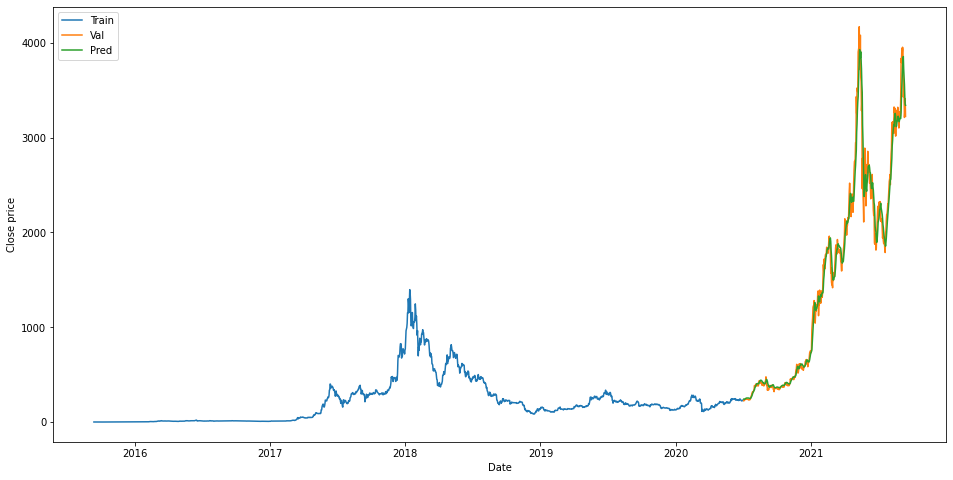

In [38]:
train = df[:training_data_len]
valid = df[training_data_len:]
valid['Prediction'] = pred

plt.figure(figsize=(16,8))
plt.xlabel("Date")
plt.ylabel("Close price")
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Prediction']])
plt.legend(['Train', 'Val', 'Pred'])
plt.show()

In [39]:
period = 30
new_data = scaled_data[len(df)-60:, :]
new_df = []
predictions = []

In [40]:
for i in range(period):
  instance = new_data[i:i+60, 0]
  new_df.append(new_data[i:i+60, 0])
  test = np.array([instance])
  test = np.reshape(test, (test.shape[0], test.shape[1], 1))
  prediction = model.predict(test)
  new_data = np.append(new_data, prediction, axis=0)
  prediction = scaler.inverse_transform(prediction)
  predictions.append(prediction.tolist()[0][0])

In [41]:
rng = pd.date_range('2021-09-14', periods=period, freq='D')
test_data = pd.DataFrame({'Date': rng, 'Forecast': predictions})
test_data = test_data.set_index(pd.DatetimeIndex(test_data['Date'].values))
test_data.head()

,Date,Forecast
2021-09-14,2021-09-14,3275.935547
2021-09-15,2021-09-15,3248.888184
2021-09-16,2021-09-16,3223.788818
2021-09-17,2021-09-17,3201.123535
2021-09-18,2021-09-18,3180.703857


In [42]:
predictions

[3275.935546875,
 3248.88818359375,
 3223.788818359375,
 3201.12353515625,
 3180.703857421875,
 3162.300537109375,
 3145.69580078125,
 3130.686767578125,
 3117.08837890625,
 3104.7333984375,
 3093.46923828125,
 3083.16064453125,
 3073.6875,
 3064.94287109375,
 3056.8330078125,
 3049.274658203125,
 3042.196044921875,
 3035.53466796875,
 3029.236572265625,
 3023.2548828125,
 3017.550537109375,
 3012.08984375,
 3006.84423828125,
 3001.789794921875,
 2996.906005859375,
 2992.1767578125,
 2987.58740234375,
 2983.12646484375,
 2978.7841796875,
 2974.552978515625]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


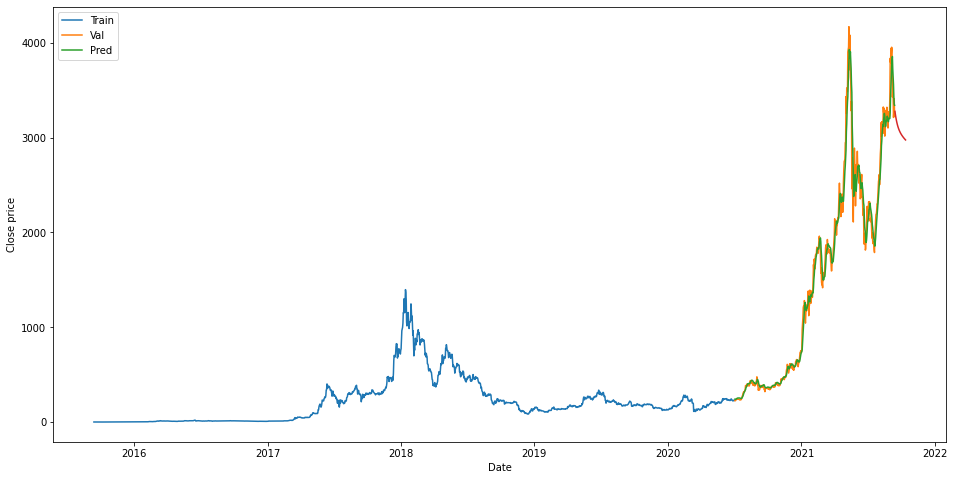

In [43]:
train = df[:training_data_len]
valid = df[training_data_len:]
valid['Prediction'] = pred

plt.figure(figsize=(16,8))
plt.xlabel("Date")
plt.ylabel("Close price")
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Prediction']])
plt.plot(test_data['Forecast'])
plt.legend(['Train', 'Val', 'Pred'])
plt.show()